In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# IRIS example

iris_training.csv

120,4,setosa,versicolor,virginica
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0
5.7,3.8,1.7,0.3,0

In [4]:
csv_filenamme = r"D:\hccho\CommonDataset\iris\iris.csv"
data = pd.read_csv(csv_filenamme,header=None,skiprows=1,names=['feaure1','feaure2','feaure3','features4','label'])
print(data.shape)
data.head(5)

(150, 5)


,feaure1,feaure2,feaure3,features4,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [20]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn import preprocessing
labels=['setosa','versicolor','virginica']
csv_filenamme = r"D:\hccho\CommonDataset\iris\iris.csv"
data = pd.read_csv(csv_filenamme,header=None,skiprows=1,names=['feaure1','feaure2','feaure3','features4','label'])

print(data.head(5))

y = data['label'] # genre variable.
X = data.loc[:, data.columns != 'label'] #select all columns but not the labels ---> pandas


#### NORMALIZE X ####
cols = X.columns
print("cols: ", cols)

stdand_scaler = preprocessing.StandardScaler()
X = stdand_scaler.fit_transform(X)  # ---> numpy array
print(X[:10])

   feaure1  feaure2  feaure3  features4  label
0      5.1      3.5      1.4        0.2      0
1      4.9      3.0      1.4        0.2      0
2      4.7      3.2      1.3        0.2      0
3      4.6      3.1      1.5        0.2      0
4      5.0      3.6      1.4        0.2      0
cols:  Index(['feaure1', 'feaure2', 'feaure3', 'features4'], dtype='object')
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]
 [-0.53717756  1.93979142 -1.16971425 -1.05217993]
 [-1.50652052  0.78880759 -1.34022653 -1.18381211]
 [-1.02184904  0.78880759 -1.2833891  -1.3154443 ]
 [-1.74885626 -0.36217625 -1.34022653 -1.3154443 ]
 [-1.14301691  0.09821729 -1.2833891  -1.44707648]]


[0.72962445 0.22850762 0.03668922] 0.9948212908928451


Text(0.5, 0, 'Principal Component 3')

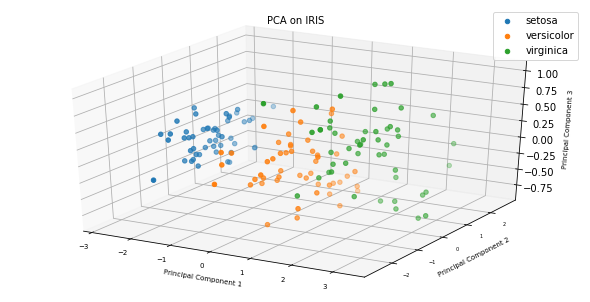

In [21]:
#### PCA 3 COMPONENTS ####
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2','principal component 3'])


# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

print(pca.explained_variance_ratio_, np.sum(pca.explained_variance_ratio_))

fig = plt.figure(figsize = (8, 4))
ax = Axes3D(fig)


for grp_name, grp_idx in finalDf.groupby('label').groups.items():
    y = finalDf.iloc[grp_idx,1]
    x = finalDf.iloc[grp_idx,0]
    z = finalDf.iloc[grp_idx,2]
    ax.scatter(x,y,z, label=labels[grp_name])  # this way you can control color/marker/size of each group freely
ax.legend()
plt.title('PCA on IRIS', fontsize = 10)
plt.xticks(fontsize = 7)
plt.yticks(fontsize = 5);
ax.set_xlabel("Principal Component 1", fontsize = 7)
ax.set_ylabel("Principal Component 2", fontsize = 7)
ax.set_zlabel("Principal Component 3", fontsize = 7)

# simaple example

In [ ]:
x1=np.array([ 1.41751313,  0.33904833,  0.29257167,  0.6478606 ,  0.90691377, 0.46082986,  0.10696884, -0.22016277, -0.01387787, -0.58088736])
x2=np.array([ 0.13784849, -0.05672081,  1.53048402,  0.6639671 ,  0.06636203,-1.09596719,  0.98829064, -0.68083318, -0.1207237 , -0.26187014])
x3 =['A','B','A','C','C','A','A','B','C','B']
data=pd.DataFrame(data=list(zip(x1,x2,x3)),columns=['age','weight','label'])

In [4]:
data.to_csv('xxx.csv',index=False)   # pd.read_csv

In [5]:
data.loc[data['label']=='A']

,age,weight,label
0,1.417513,0.137848,A
2,0.292572,1.530484,A
5,0.460830,-1.095967,A
6,0.106969,0.988291,A


In [6]:
data.groupby('label').mean()

,age,weight
label,,
A,0.569471,0.390164
B,-0.154001,-0.333141
C,0.513632,0.203202


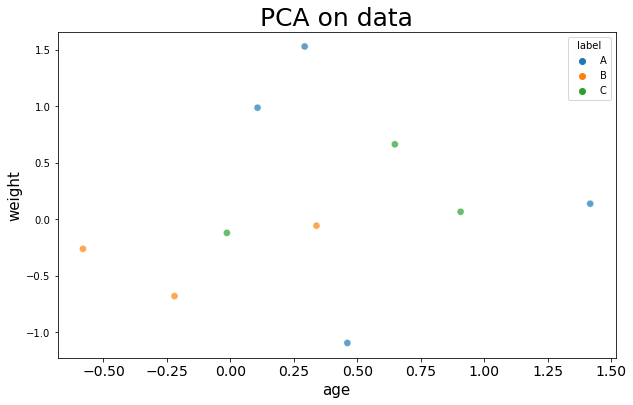

In [7]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = "age", y = "weight", data = data, hue = "label", alpha = 0.7, s = 50); # s=size

plt.title('PCA on data', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("age", fontsize = 15)
plt.ylabel("weight", fontsize = 15)
plt.show()

In [8]:
data.values

array([[1.41751313, 0.13784849, 'A'],
       [0.33904833, -0.05672081, 'B'],
       [0.29257167, 1.53048402, 'A'],
       [0.6478606, 0.6639671, 'C'],
       [0.90691377, 0.06636203, 'C'],
       [0.46082986, -1.09596719, 'A'],
       [0.10696884, 0.98829064, 'A'],
       [-0.22016277, -0.68083318, 'B'],
       [-0.01387787, -0.1207237, 'C'],
       [-0.58088736, -0.26187014, 'B']], dtype=object)

In [9]:
data['age'].values

array([ 1.41751313,  0.33904833,  0.29257167,  0.6478606 ,  0.90691377,
        0.46082986,  0.10696884, -0.22016277, -0.01387787, -0.58088736])

In [10]:
data.sort_values(['label'],ascending=[True]) # data가 바뀌지는 않는다.  inplace=True 해야 바뀐다.

,age,weight,label
0,1.417513,0.137848,A
2,0.292572,1.530484,A
5,0.460830,-1.095967,A
6,0.106969,0.988291,A
1,0.339048,-0.056721,B
7,-0.220163,-0.680833,B
9,-0.580887,-0.261870,B
3,0.647861,0.663967,C
4,0.906914,0.066362,C
8,-0.013878,-0.120724,C


In [11]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('precision', 3)

In [12]:
data

,age,weight,label
0,1.418,0.138,A
1,0.339,-0.057,B
2,0.293,1.530,A
3,0.648,0.664,C
4,0.907,0.066,C
5,0.461,-1.096,A
6,0.107,0.988,A
7,-0.220,-0.681,B
8,-0.014,-0.121,C
9,-0.581,-0.262,B


In [13]:
# count()
data.groupby('label').count()


,age,weight
label,,
A,4,4
B,3,3
C,3,3


In [14]:
# column 1개인 경우.
# from collections import Counter    ---->   Counter(data['label'])  ---->  Counter({'A': 4, 'B': 3, 'C': 3})

data['label'].value_counts()

A    4
B    3
C    3
Name: label, dtype: int64

## Panda From numpy array

In [2]:
from sklearn import datasets

In [3]:
iris = datasets.load_iris()  # dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [9]:
iris['data'].shape, iris['target'].shape

((150, 4), (150,))

In [15]:
iris['filename']

'C:\\Anaconda3\\envs\\tf2\\lib\\site-packages\\sklearn\\datasets\\data\\iris.csv'

In [16]:
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['target'])

In [21]:
data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


In [22]:
data = data.sample(frac = 1) 

In [23]:
data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
71,6.1,2.8,4.0,1.3,1.0
132,6.4,2.8,5.6,2.2,2.0
45,4.8,3.0,1.4,0.3,0.0
41,4.5,2.3,1.3,0.3,0.0
98,5.1,2.5,3.0,1.1,1.0
60,5.0,2.0,3.5,1.0,1.0
121,5.6,2.8,4.9,2.0,2.0
131,7.9,3.8,6.4,2.0,2.0
42,4.4,3.2,1.3,0.2,0.0
63,6.1,2.9,4.7,1.4,1.0


In [26]:
data.values[:,:3]

array([[6.1, 2.8, 4. ],
       [6.4, 2.8, 5.6],
       [4.8, 3. , 1.4],
       [4.5, 2.3, 1.3],
       [5.1, 2.5, 3. ],
       [5. , 2. , 3.5],
       [5.6, 2.8, 4.9],
       [7.9, 3.8, 6.4],
       [4.4, 3.2, 1.3],
       [6.1, 2.9, 4.7],
       [5.1, 3.3, 1.7],
       [5.6, 2.7, 4.2],
       [6.9, 3.1, 5.4],
       [6. , 2.2, 5. ],
       [5. , 3.4, 1.6],
       [7.7, 2.8, 6.7],
       [6.7, 3.3, 5.7],
       [4.9, 3.1, 1.5],
       [7.1, 3. , 5.9],
       [5.7, 4.4, 1.5],
       [6.9, 3.1, 5.1],
       [6.5, 2.8, 4.6],
       [4.8, 3.4, 1.6],
       [5.4, 3.4, 1.5],
       [7.6, 3. , 6.6],
       [5. , 3. , 1.6],
       [5.7, 2.8, 4.1],
       [7.7, 3. , 6.1],
       [5.6, 2.9, 3.6],
       [5. , 3.6, 1.4],
       [6. , 3.4, 4.5],
       [6.8, 3. , 5.5],
       [4.9, 2.4, 3.3],
       [5.7, 2.9, 4.2],
       [4.8, 3.1, 1.6],
       [5.1, 3.8, 1.5],
       [6. , 2.7, 5.1],
       [5. , 3.5, 1.3],
       [5.2, 3.4, 1.4],
       [6.1, 3. , 4.9],
       [6. , 2.2, 4. ],
       [6.3, 2.9

## Simple Deep Lerning Model with Tensorflow(IRIS)

In [98]:
from sklearn import datasets
import tensorflow as tf
import matplotlib.pyplot as plt
iris = datasets.load_iris()

In [107]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=(4,), activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),      
    tf.keras.layers.Dense(3, activation='softmax')
])
optimiser = tf.keras.optimizers.Adam(learning_rate=0.001)  # pytorch와 달리, 0.01 또는 0.001일 때, 잘된다. 0.0001이면 별로...
# tf.keras.losses.categorical_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0)  ---> default: logit이 아니 확률
model.compile(optimizer=optimiser, loss='sparse_categorical_crossentropy', metrics=['accuracy'])  # sparse ---> target이 onthot이 아니어도 된다.
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 10)                50        
_________________________________________________________________
dense_31 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_32 (Dense)             (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [108]:
history = model.fit(iris['data'], iris['target'], batch_size=32, epochs=200)

Epoch 1/200
5/5 [==============================] - 0s 2ms/step - loss: 2.6167 - accuracy: 0.3333
Epoch 2/200
5/5 [==============================] - 0s 2ms/step - loss: 2.5720 - accuracy: 0.3333
Epoch 3/200
5/5 [==============================] - 0s 2ms/step - loss: 2.5283 - accuracy: 0.3333
Epoch 4/200
5/5 [==============================] - 0s 2ms/step - loss: 2.4844 - accuracy: 0.3333
Epoch 5/200
5/5 [==============================] - 0s 2ms/step - loss: 2.4402 - accuracy: 0.3333
Epoch 6/200
5/5 [==============================] - 0s 1ms/step - loss: 2.3968 - accuracy: 0.3333
Epoch 7/200
5/5 [==============================] - 0s 1ms/step - loss: 2.3542 - accuracy: 0.3333
Epoch 8/200
5/5 [==============================] - 0s 1ms/step - loss: 2.3128 - accuracy: 0.3333
Epoch 9/200
5/5 [==============================] - 0s 1ms/step - loss: 2.2705 - accuracy: 0.3333
Epoch 10/200
5/5 [==============================] - 0s 1ms/step - loss: 2.2289 - accuracy: 0.3333
Epoch 11/200
5/5 [===========

5/5 [==============================] - 0s 1ms/step - loss: 0.6304 - accuracy: 0.8667
Epoch 167/200
5/5 [==============================] - 0s 1ms/step - loss: 0.6290 - accuracy: 0.8667
Epoch 168/200
5/5 [==============================] - 0s 1ms/step - loss: 0.6276 - accuracy: 0.8667
Epoch 169/200
5/5 [==============================] - 0s 1ms/step - loss: 0.6262 - accuracy: 0.8667
Epoch 170/200
5/5 [==============================] - 0s 1ms/step - loss: 0.6248 - accuracy: 0.8667
Epoch 171/200
5/5 [==============================] - 0s 1ms/step - loss: 0.6234 - accuracy: 0.8667
Epoch 172/200
5/5 [==============================] - 0s 1ms/step - loss: 0.6221 - accuracy: 0.8733
Epoch 173/200
5/5 [==============================] - 0s 1ms/step - loss: 0.6208 - accuracy: 0.8733
Epoch 174/200
5/5 [==============================] - 0s 1ms/step - loss: 0.6194 - accuracy: 0.8733
Epoch 175/200
5/5 [==============================] - 0s 1ms/step - loss: 0.6180 - accuracy: 0.8800
Epoch 176/200
5/5 [=====

(0, 1)

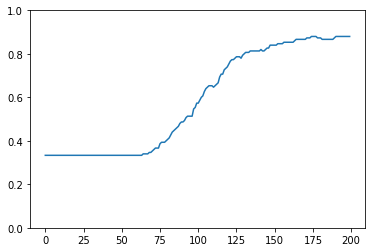

In [109]:
plt.plot(history.history["accuracy"], label="train accuracy")
plt.ylim([0,1])

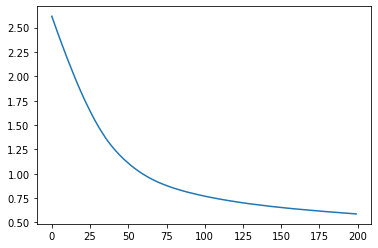

In [110]:
plt.plot(history.history["loss"], label="train loss")

## Simple Deep Lerning Model with Pytorch(IRIS)
  * tensorflow 보다 learning rate에 더 민감하다.
  * weight 초기화는 효과가 없다.
  * learning rate을 낮게 하고, train 횟수를 늘이면, 수렴은 한다.

In [81]:
from sklearn import datasets
import torch
from torch import nn,optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
import numpy as np
import tqdm
from sklearn import preprocessing
import matplotlib.pyplot as plt
iris = datasets.load_iris()

In [124]:
def weights_init(m):
    if type(m) == nn.Linear:
        #torch.nn.init.xavier_normal_(m.weight)
        torch.nn.init.normal_(m.weight, mean=0.0, std=0.1)
        torch.nn.init.zeros_(m.bias)  # m.bias.data.fill_(0.)  
    elif isinstance(m, nn.Conv2d):
        torch.nn.init.xavier_uniform_(m.weight)
        torch.nn.init.zeros_(m.bias) 

model = nn.Sequential(nn.Linear(4,10),nn.ReLU(),nn.Linear(10,10),nn.ReLU(),nn.Linear(10,3))
#model.apply(weights_init)  # apply는 nn.Module로 부터 상속.

In [125]:
normal_flag = False

if normal_flag:
    stdand_scaler = preprocessing.StandardScaler()
    data_x = stdand_scaler.fit_transform(iris['data'])  # ---> numpy array
else:
    data_x = iris['data']

X = torch.tensor(data_x, dtype=torch.float32)
Y = torch.tensor(iris['target'],dtype=torch.long)
ds = TensorDataset(X,Y)  # tensor가 들어가야 한다.
loader = DataLoader(ds, batch_size=64, shuffle=True)

In [126]:
print(model)

Sequential(
  (0): Linear(in_features=4, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=3, bias=True)
)


In [127]:
loss_fn = nn.CrossEntropyLoss()  # 넘길 때, (N,C), (N,)  <--- one_hot으로 변환하지 않는 target을 넘긴다.
optimizer = optim.Adam(model.parameters(),lr=0.001)   # tensorflow와 달리 lr=0.0001일 때, 잘된다.

In [134]:
n_epoch = 200

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model.to(device)
history_loss = []
history_acc  = []
for epoch in range(n_epoch):
    model.train()
    running_loss = []
    acc = 0
    n = 0
    for i,(x,y) in enumerate(loader):
        x = x.to(device)
        y = y.to(device)
        pred = model(x)
        loss = loss_fn(pred,y)
        loss.backward()
        optimizer.step()
        running_loss.append(loss.item())
        _,pred = pred.max(1)
        acc += (pred==y).float().sum().item()
        n += len(y)
    
    history_loss.append(np.mean(running_loss))
    history_acc.append(acc/n)
    print('epoch: {}/{}, loss: {:.4f}, acc: {:.4f}'.format(epoch+1,n_epoch,history_loss[-1],history_acc[-1]))
    

cuda
epoch: 1/200, loss: 0.0616, acc: 0.9800
epoch: 2/200, loss: 0.0974, acc: 0.9800
epoch: 3/200, loss: 0.0794, acc: 0.9800
epoch: 4/200, loss: 0.0742, acc: 0.9667
epoch: 5/200, loss: 0.0552, acc: 0.9667
epoch: 6/200, loss: 0.0578, acc: 0.9667
epoch: 7/200, loss: 0.0888, acc: 0.9733
epoch: 8/200, loss: 0.0765, acc: 0.9733
epoch: 9/200, loss: 0.0619, acc: 0.9733
epoch: 10/200, loss: 0.0456, acc: 0.9733
epoch: 11/200, loss: 0.0492, acc: 0.9733
epoch: 12/200, loss: 0.0602, acc: 0.9733
epoch: 13/200, loss: 0.0494, acc: 0.9733
epoch: 14/200, loss: 0.0555, acc: 0.9667
epoch: 15/200, loss: 0.0730, acc: 0.9667
epoch: 16/200, loss: 0.0946, acc: 0.9667
epoch: 17/200, loss: 0.0625, acc: 0.9667
epoch: 18/200, loss: 0.0733, acc: 0.9667
epoch: 19/200, loss: 0.0635, acc: 0.9667
epoch: 20/200, loss: 0.0631, acc: 0.9667
epoch: 21/200, loss: 0.0765, acc: 0.9667
epoch: 22/200, loss: 0.0919, acc: 0.9667
epoch: 23/200, loss: 0.0663, acc: 0.9600
epoch: 24/200, loss: 0.0697, acc: 0.9600
epoch: 25/200, loss:

(0, 1)

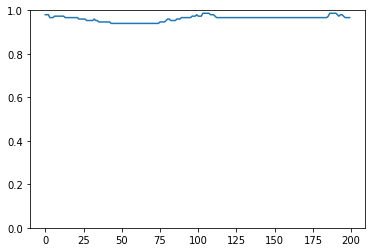

In [135]:
plt.plot(history_acc, label="train accuracy")
plt.ylim([0,1])

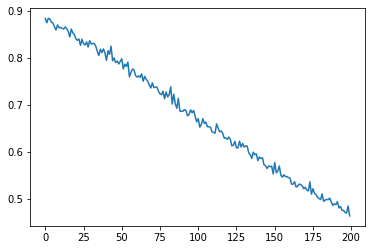

In [89]:
plt.plot(history_loss, label="train accuracy")

## Logitic Regression

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime
import sys
import seaborn as sns
import pandas as pd
import tensorflow as tf

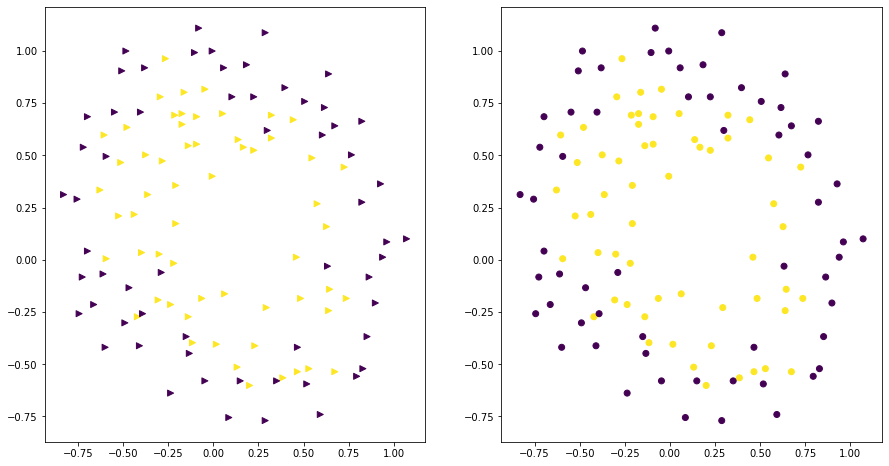

In [58]:
mydata = np.genfromtxt('mydata2.txt',delimiter=',',dtype=np.float32)
A = mydata[:,0:2]
B = mydata[:,-1].reshape(-1,1)  # mydata[:,2:3]
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.scatter(A[:, 0], A[:, 1], c=B[:,0],marker=">")
plt.subplot(1,2,2)
plt.scatter(A[:, 0], A[:, 1], c=B[:,0],marker="o")

#A = (A-np.mean(A,0))/np.std(A,0)

In [59]:
df=pd.DataFrame(data=mydata,columns=['x','y','c'])
df.head(5)
print("data 갯수: ",len(df))

data 갯수:  118


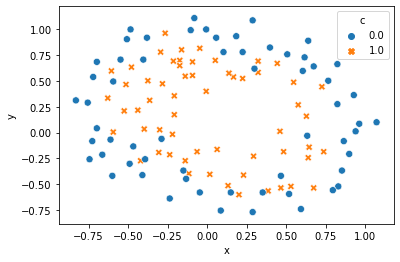

In [60]:
# pandas dataframe을 넘겨주면 좋다.
sns.scatterplot(x='x', 
                y='y', 
                hue='c', # different colors by group
                style='c', # different shapes by group
                s=50, # marker size
                data=df)

In [61]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=(2,), activation='relu'),  
    tf.keras.layers.Dense(1, activation='sigmoid')
])
optimiser = tf.keras.optimizers.Adam(learning_rate=0.01)  # pytorch와 달리, 0.01 또는 0.001일 때, 잘된다. 0.0001이면 별로...
# tf.keras.losses.categorical_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0)  ---> default: logit이 아니 확률
model.compile(optimizer=optimiser, loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])  # sparse ---> target이 onthot이 아니어도 된다.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                30        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7027 - accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.4746
Epoch 3/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6952 - accuracy: 0.5169
Epoch 4/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5339
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.5254
Epoch 6/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6887 - accuracy: 0.5169
Epoch 7/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6870 - accuracy: 0.5000
Epoch 8/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6857 - accuracy: 0.4915
Epoch 9/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6843 - accuracy: 0.5085
Epoch 10/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6829 - accuracy: 0.5254
Epoch 11/100
2/2 [===========

2/2 [==============================] - 0s 1ms/step - loss: 0.4814 - accuracy: 0.8220
Epoch 85/100
2/2 [==============================] - 0s 997us/step - loss: 0.4795 - accuracy: 0.8220
Epoch 86/100
2/2 [==============================] - 0s 998us/step - loss: 0.4760 - accuracy: 0.8390
Epoch 87/100
2/2 [==============================] - 0s 1ms/step - loss: 0.4740 - accuracy: 0.8305
Epoch 88/100
2/2 [==============================] - 0s 997us/step - loss: 0.4700 - accuracy: 0.8305
Epoch 89/100
2/2 [==============================] - 0s 1ms/step - loss: 0.4681 - accuracy: 0.8220
Epoch 90/100
2/2 [==============================] - 0s 1ms/step - loss: 0.4652 - accuracy: 0.8390
Epoch 91/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4626 - accuracy: 0.8390
Epoch 92/100
2/2 [==============================] - 0s 1ms/step - loss: 0.4600 - accuracy: 0.8305
Epoch 93/100
2/2 [==============================] - 0s 1ms/step - loss: 0.4576 - accuracy: 0.8136
Epoch 94/100
2/2 [=========

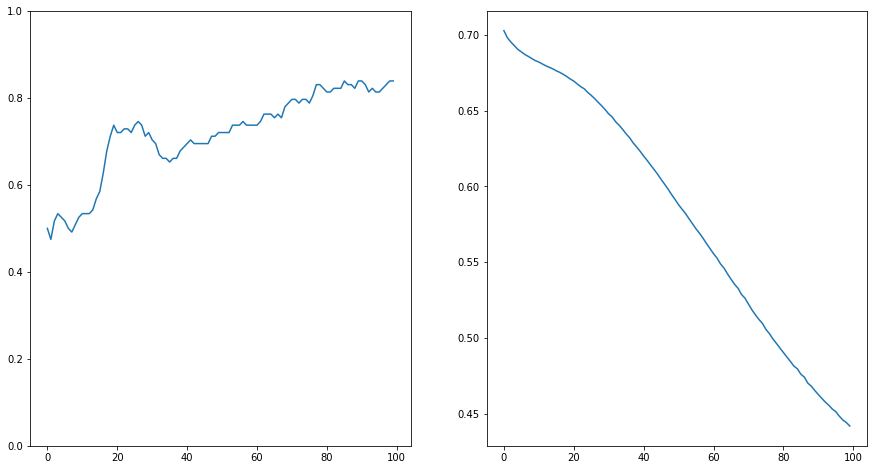

In [62]:
# 모델의 output이 (N,1) 이므로, target도 (N,1)이 되어야 한다. target이 (N,)이면 안된다.

history = model.fit(A, B, batch_size=64, epochs=100)  # 출력: (N,1), target: (N,1)

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="train accuracy")
plt.ylim([0,1])
plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="train loss")

Text(0.5, 1.0, 'tf prediction')

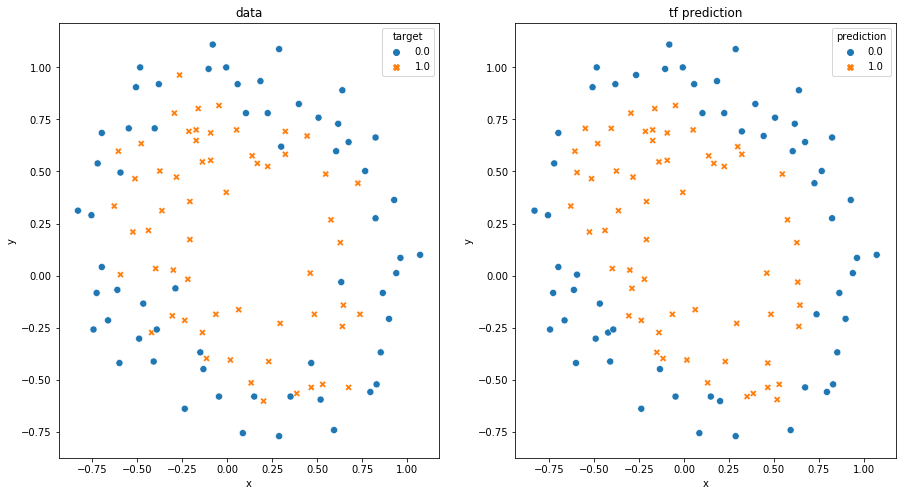

In [173]:
df1=pd.DataFrame(data=mydata,columns=['x','y','target'])

prediction = (model.predict(A) > 0.5).astype(np.int)
  # np.concatenate([A,prediction],axis=-1)
df2=pd.DataFrame(data=np.c_[A,prediction],columns=['x','y','prediction'])
# pandas dataframe을 넘겨주어면 좋다.


plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.scatterplot(x='x', 
                y='y', 
                hue='target', # different colors by group
                style='target', # different shapes by group
                s=50, # marker size
                data=df1)
plt.title('data')


plt.subplot(1,2,2)
sns.scatterplot(x='x', 
                y='y', 
                hue='prediction', # different colors by group
                style='prediction', # different shapes by group
                s=50, # marker size
                data=df2)
plt.title('tf prediction')

## xgboost for iris dataset

In [10]:
import pandas as pd
from sklearn import datasets
from sklearn import preprocessing
from xgboost import XGBClassifier, XGBRFClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = datasets.load_iris()  # dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
labels=['setosa','versicolor','virginica']

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(iris['data'])
Y = [labels[y] for y in iris['target']]

x_train = pd.DataFrame(data= X,columns= iris['feature_names'] )
y_train = pd.Series(data= Y)
print(x_train.head(5))
print(y_train.head(5))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.222222          0.625000           0.067797          0.041667
1           0.166667          0.416667           0.067797          0.041667
2           0.111111          0.500000           0.050847          0.041667
3           0.083333          0.458333           0.084746          0.041667
4           0.194444          0.666667           0.067797          0.041667
0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
dtype: object


In [3]:
xgb = XGBClassifier(n_estimators=100, learning_rate=0.05)
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [4]:
pred = xgb.predict(x_train)
np.mean(pred==Y)

1.0

## xgboost for mydata

In [5]:
df = pd.read_csv("mydata2.txt", header=None,names=['x','y','label'])
df.head()

,x,y,label
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,0.183760,0.93348,0
3,0.224080,0.77997,0
4,-0.213710,0.69225,1


In [6]:
X = df.loc[:, df.columns != 'label']
Y = df['label']  # Series

In [7]:
xgb = XGBClassifier(n_estimators=100, learning_rate=0.05)
xgb.fit(X, Y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [8]:
prediction = xgb.predict(X)
np.mean(prediction==Y)

0.9322033898305084

Text(0.5, 1.0, 'xgboost prediction')

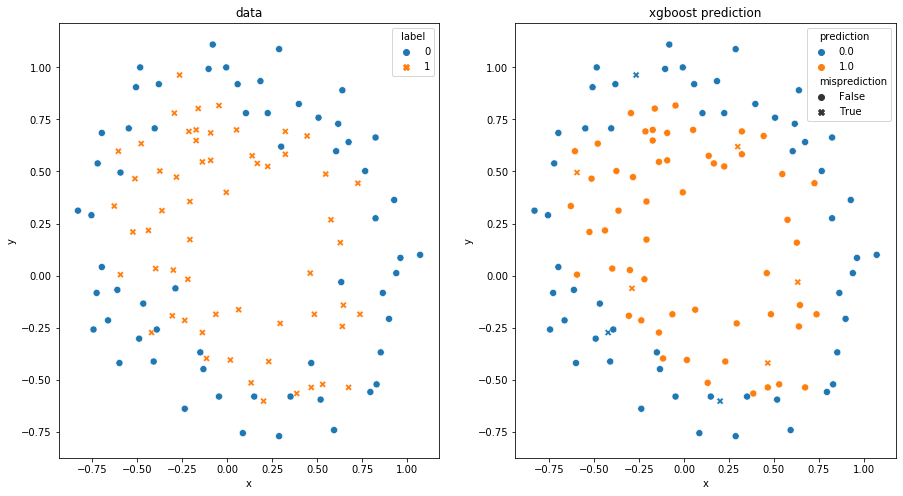

In [17]:
df_pred=pd.DataFrame(data=np.c_[X.values,Y.values, prediction],columns=['x','y','label','prediction'])
df_pred['misprediction']=df_pred['label'] != df_pred['prediction']
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.scatterplot(x='x', 
                y='y', 
                hue='label', # different colors by group
                style='label', # different shapes by group
                s=50, # marker size
                data=df)
plt.title('data')


plt.subplot(1,2,2)
sns.scatterplot(x='x', 
                y='y', 
                hue='prediction', # different colors by group
                style='misprediction', # different shapes by group
                s=50, # marker size
                data=df_pred)
plt.title('xgboost prediction')

In [12]:
df_pred[df_pred['label'] != df_pred['prediction']]

,x,y,label,prediction,correct
25,-0.42108,-0.272660,1.0,0.0,True
27,0.20104,-0.601610,1.0,0.0,True
32,-0.26555,0.962720,1.0,0.0,True
60,0.29896,0.619150,0.0,1.0,True
76,0.46601,-0.418860,0.0,1.0,True
107,-0.28859,-0.060673,0.0,1.0,True
114,-0.59389,0.494880,0.0,1.0,True
117,0.63265,-0.030612,0.0,1.0,True


In [13]:
df_pred

,x,y,label,prediction,correct
0,0.051267,0.699560,1.0,1.0,False
1,-0.092742,0.684940,1.0,1.0,False
2,0.183760,0.933480,0.0,0.0,False
3,0.224080,0.779970,0.0,0.0,False
4,-0.213710,0.692250,1.0,1.0,False
...,...,...,...,...,...
113,-0.720620,0.538740,0.0,0.0,False
114,-0.593890,0.494880,0.0,1.0,True
115,-0.484450,0.999270,0.0,0.0,False
116,-0.006336,0.999270,0.0,0.0,False


In [15]:
prediction==Y

0       True
1       True
2       True
3       True
4       True
       ...  
113     True
114    False
115     True
116     True
117    False
Name: label, Length: 118, dtype: bool